In [1]:
%load_ext autoreload

In [2]:
%autoreload
from pathlib import Path
import polars as pl

from MEDS_visualizations.extractors import CodeFrequency
from MEDS_visualizations.plotters import Bar
from MEDS_visualizations.visualization import Visualization

In [3]:
MIMIC_ROOT = Path("/n/data1/hms/dbmi/zaklab/MIMIC-IV/MEDS_DEV_MIMIC")
data_shards = list((MIMIC_ROOT / "data").rglob("*.parquet"))
def read_shard(fp: Path) -> pl.DataFrame:
    return pl.read_parquet(fp, use_pyarrow=True)

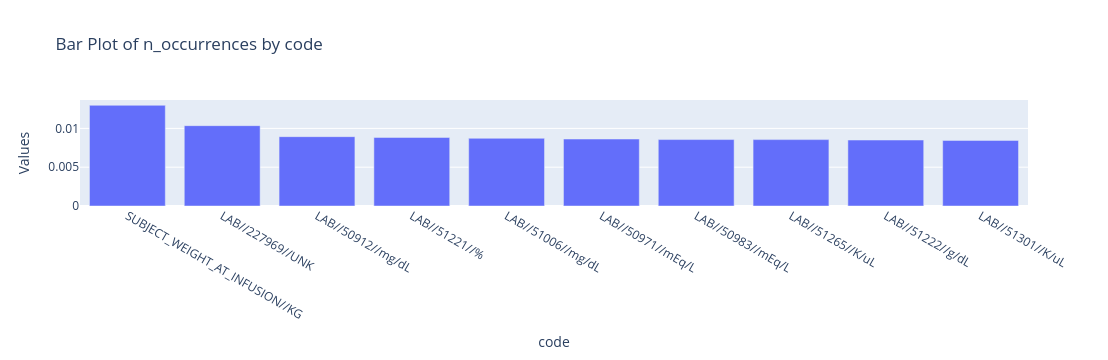

In [6]:
CF = CodeFrequency(as_proportions=True)
P = Bar(top_k=10, y_cols=["n_occurrences"])
N_shards=1

V = Visualization(extractor=CF, plotter=P)
V.render([read_shard(fp) for fp in data_shards[:N_shards]])